/tmp/ipykernel_4017372/3883525471.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  teacher_checkpoint = torch.load('teacher-test.pth', map_location=cfg.DEVICE)


0.95


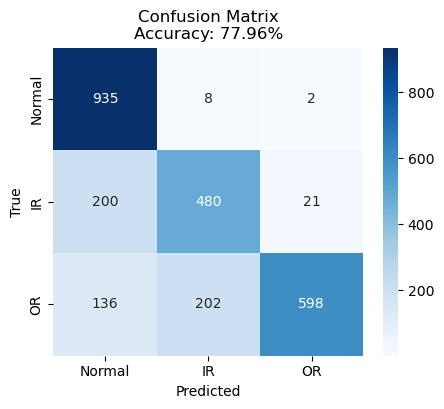

 - Model accuracy: 77.96%
0.95


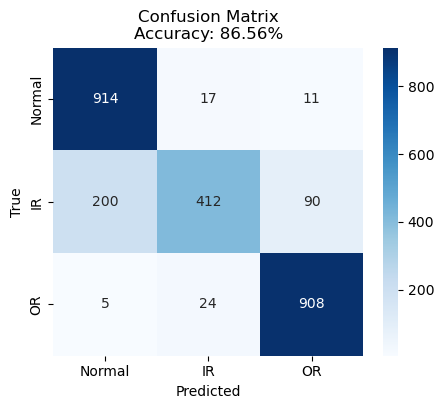

 - Model accuracy: 86.56%
0.95


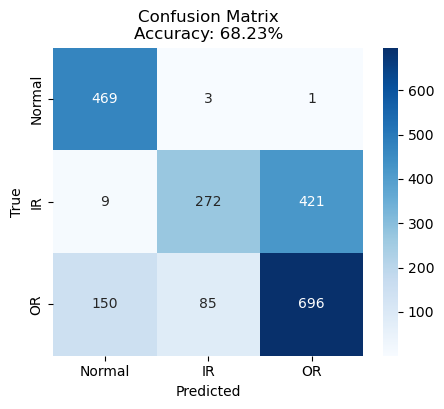

 - Model accuracy: 68.23%
0.95


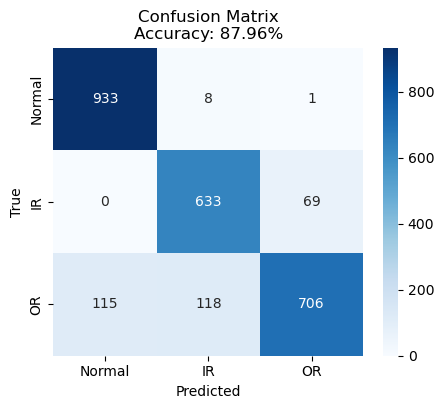

 - Model accuracy: 87.96%
0.95


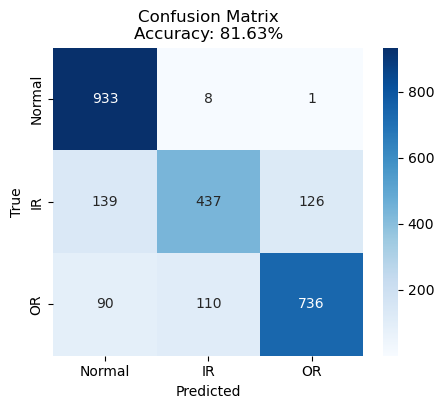

 - Model accuracy: 81.63%
0.95


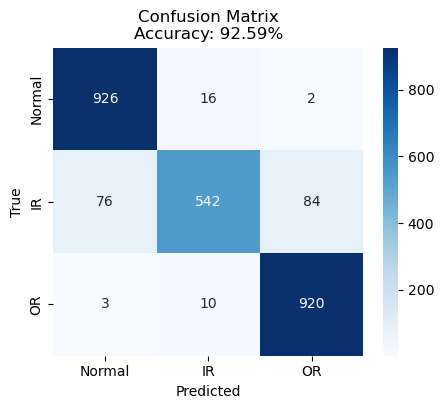

 - Model accuracy: 92.59%
0.95


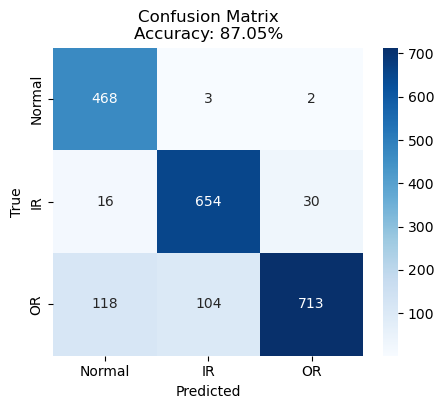

 - Model accuracy: 87.05%
0.95


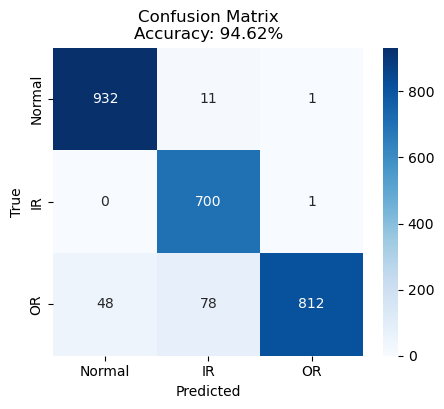

 - Model accuracy: 94.62%
0.95


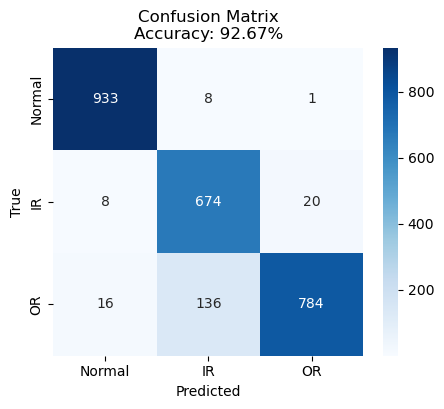

 - Model accuracy: 92.67%
0.95


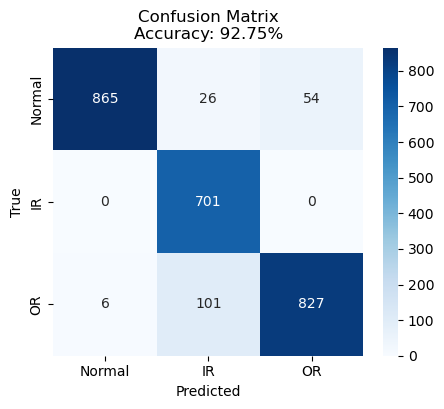

 - Model accuracy: 92.75%
0.95


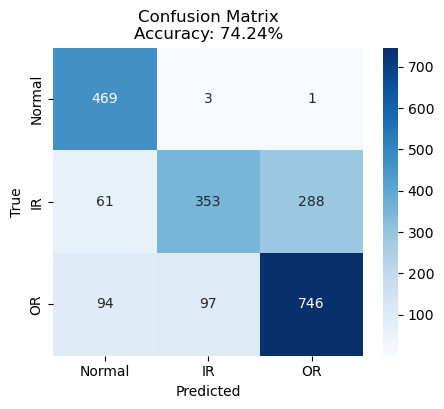

 - Model accuracy: 74.24%
0.95


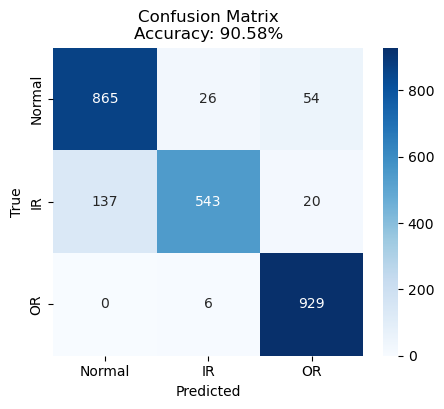

 - Model accuracy: 90.58%
0.95


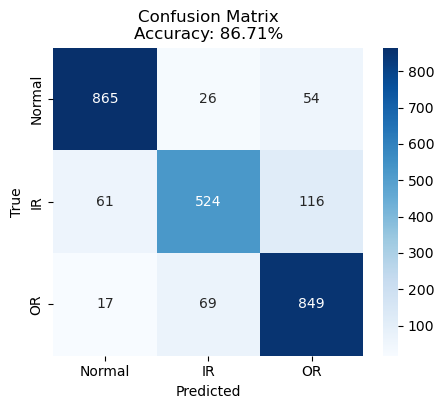

 - Model accuracy: 86.71%
0.95


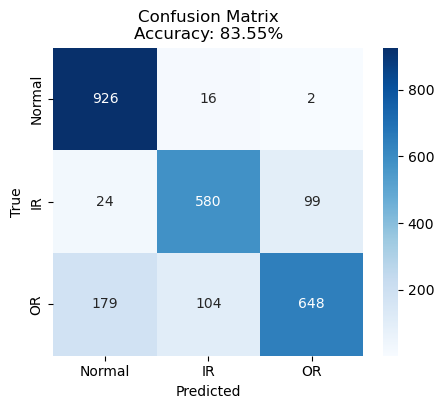

 - Model accuracy: 83.55%
0.95


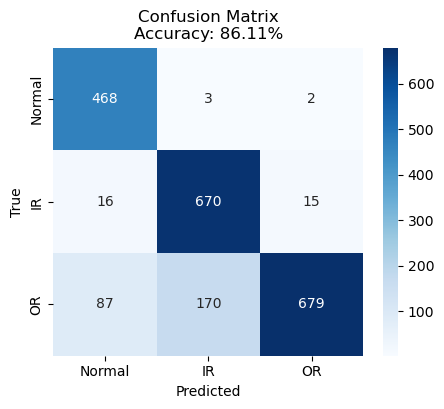

 - Model accuracy: 86.11%
0.95


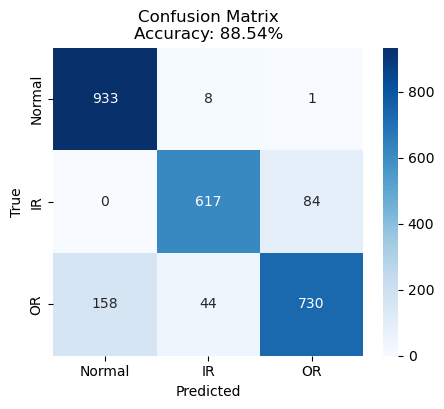

 - Model accuracy: 88.54%
0.95


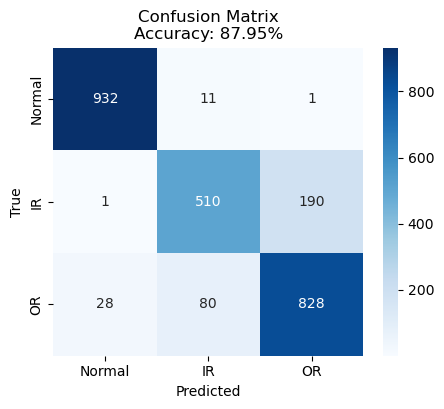

 - Model accuracy: 87.95%
0.95


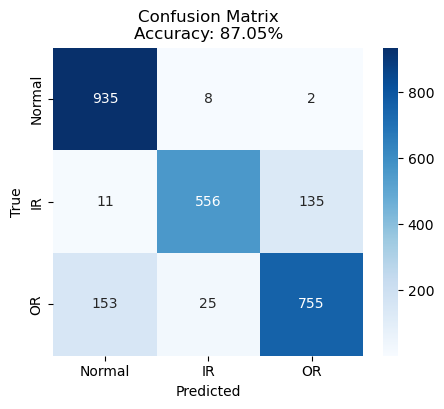

 - Model accuracy: 87.05%
0.95


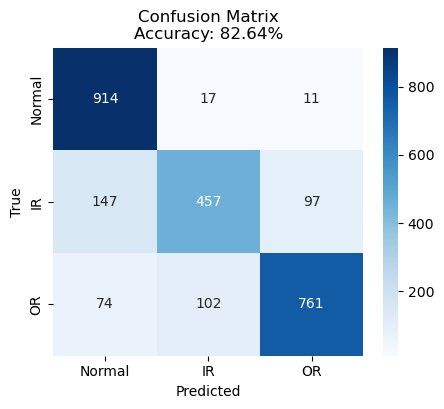

 - Model accuracy: 82.64%
0.95


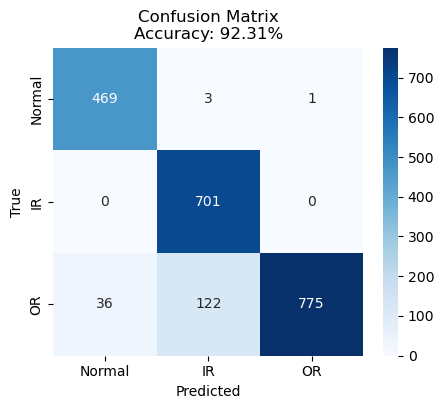

 - Model accuracy: 92.31%
0.95


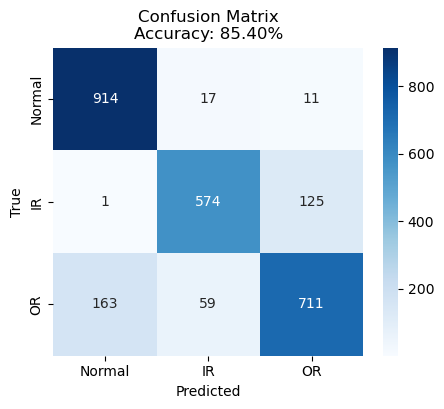

 - Model accuracy: 85.40%
0.95


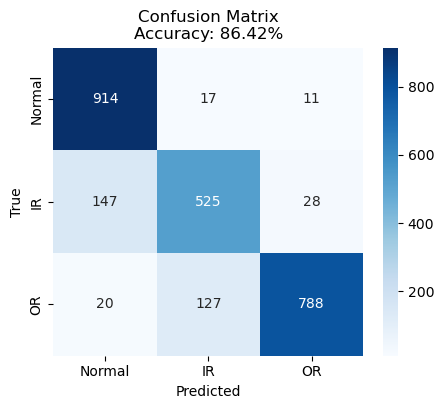

 - Model accuracy: 86.42%
0.95


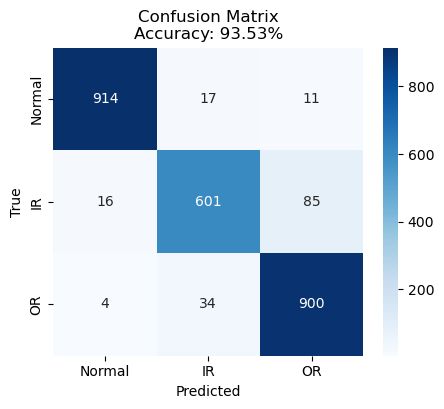

 - Model accuracy: 93.53%
0.95


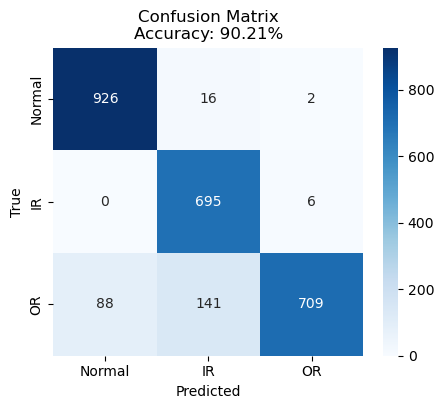

 - Model accuracy: 90.21%
0.95


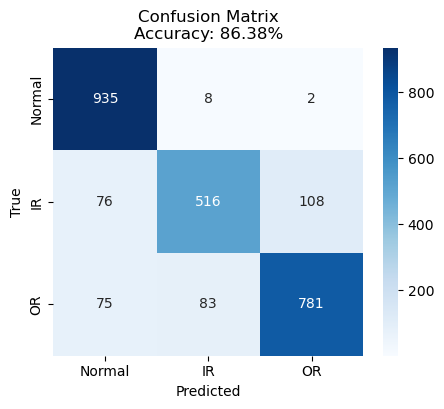

 - Model accuracy: 86.38%
0.95


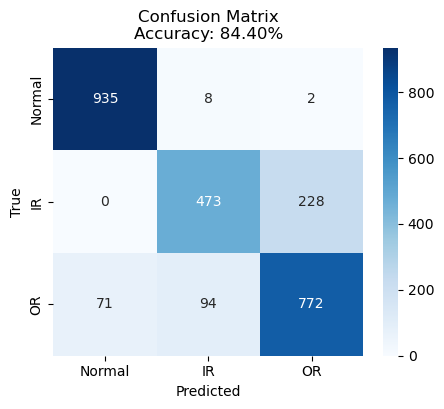

 - Model accuracy: 84.40%
0.95


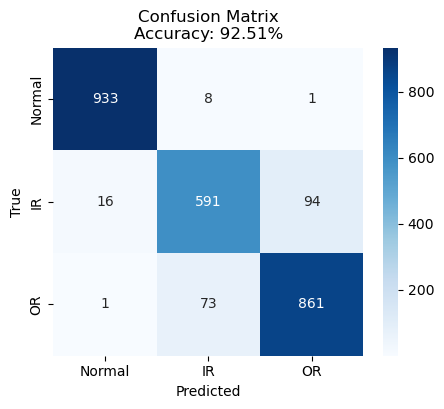

 - Model accuracy: 92.51%
0.95


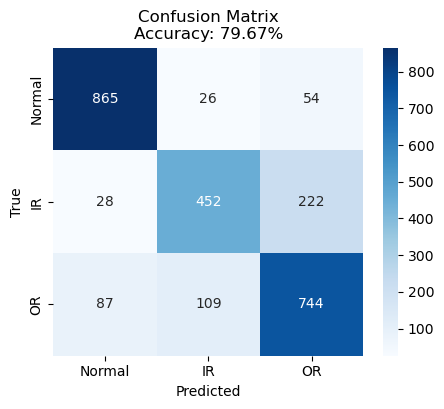

 - Model accuracy: 79.67%
0.95


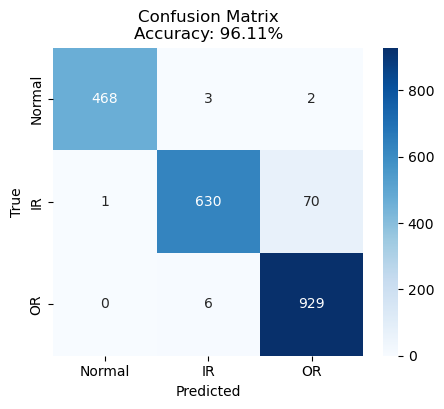

 - Model accuracy: 96.11%
0.95


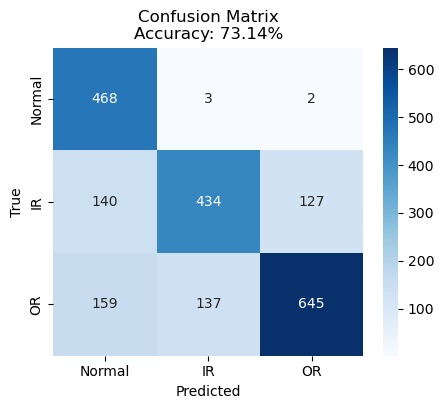

 - Model accuracy: 73.14%
Mean accuracy: 0.8631637880528422
Std accuracy: 0.06494834856284232


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch

accuracy_list = []


teacher_model = models.Deeper1DCNN(input_channels=1, num_classes=cfg.NUM_CLASSES) # Hoặc model lớn hơn bạn đã dùng
teacher_checkpoint = torch.load('teacher-test.pth', map_location=cfg.DEVICE)
teacher_model.load_state_dict(teacher_checkpoint['model_state_dict']) #what this

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    accuracy = evaluate.plot_confusion_matrix(teacher_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))